 ### Task 1: Data Exploration
 Load the dataset into a Python environment (e.g., Jupyter   Notebook).
 Display the first few rows of the dataset to understand its structure.
 Check for missing values and handle them if necessary.
 Summarize basic statistics (mean, median, standard deviation, etc.)
 for the numeric columns.
### Task 2: Data Visualization
 2.1 Univariate Analysis
 Explore the distribution of numeric columns using the following   
visualizations:
- Histograms: Plot the frequency distribution of key numeric variables.
- Box Plots: Identify potential outliers and visualize the spread of
 data.
- Analyze categorical variables by creating the following plots:
- Bar Charts: Visualize the frequency distribution of categorical
 variables.
- Pie Charts: Represent the composition of categorical variables.
  
 2.2 Bivariate Analysis
- Create scatter plots to explore relationships between pairs of numeric
 variables.
- Use pair plots (scatter matrix) to visualize interactions between
 multiple numeric variables
 simultaneously.
- Investigate the relationship between categorical and numeric
 variables using box plots or
 violin plots.

 2.3 Multivariate Analysis
- Perform a correlation analysis to identify relationships between
 numeric variables. Visualize
 correlations using a heatmap.
- Create a stacked bar chart to show the distribution of categorical
 variables across multiple
 categories.

In [6]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv("loan_sanction_test (1).csv", index_col = 'Loan_ID' )
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
## information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [58]:
## rows and column of dataset
df.shape

(367, 11)

In [60]:
## Missing values
(df.isnull().sum()/len(df))*100

Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [62]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

### No requirement of dropping any column
### We have to handle missing values

In [65]:
numerical_col = df.select_dtypes(include = ['int64', 'float64'])
cat_col = df.select_dtypes(include = 'object')

In [67]:
cat_col

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001015,Male,Yes,0,Graduate,No,Urban
LP001022,Male,Yes,1,Graduate,No,Urban
LP001031,Male,Yes,2,Graduate,No,Urban
LP001035,Male,Yes,2,Graduate,No,Urban
LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
LP002975,Male,Yes,0,Graduate,No,Urban
LP002980,Male,No,0,Graduate,No,Semiurban


In [69]:
numerical_col

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001015,5720,0,110.0,360.0,1.0
LP001022,3076,1500,126.0,360.0,1.0
LP001031,5000,1800,208.0,360.0,1.0
LP001035,2340,2546,100.0,360.0,NaN
LP001051,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
LP002971,4009,1777,113.0,360.0,1.0
LP002975,4158,709,115.0,360.0,1.0
LP002980,3250,1993,126.0,360.0,NaN


In [71]:
## Numerical col missing values
numerical_col.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
dtype: int64

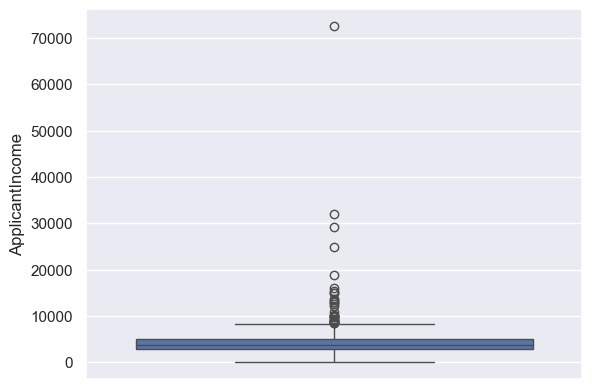

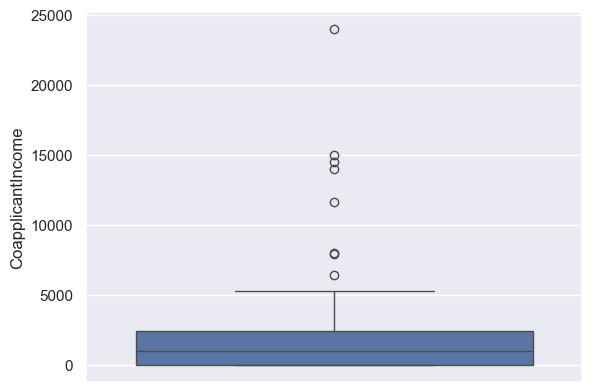

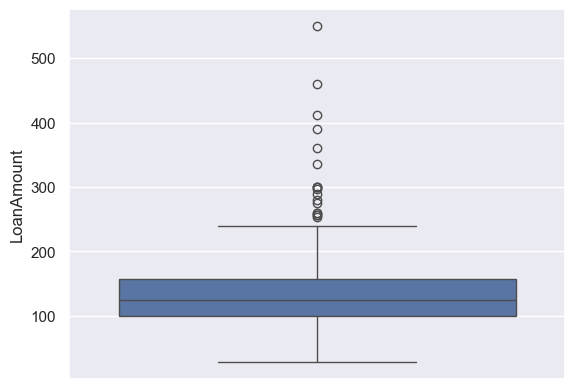

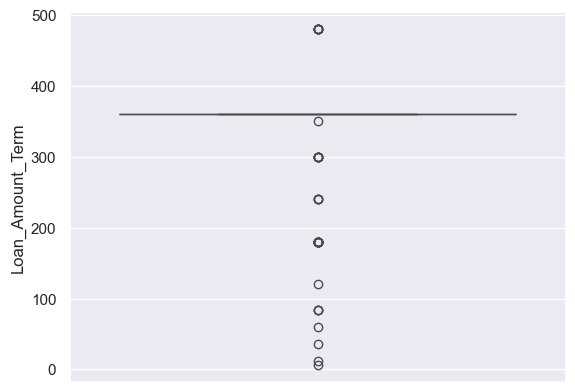

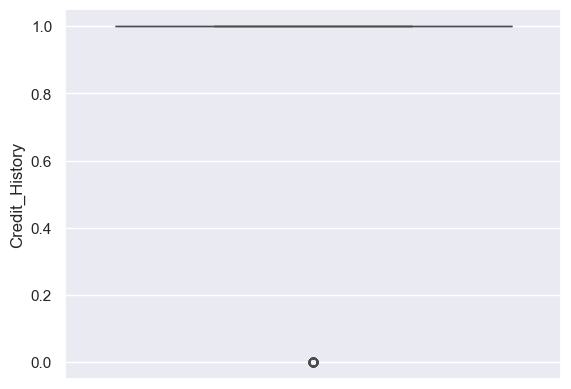

In [73]:
for i in numerical_col:
    sns.boxplot(df[i])
    plt.show()

In [74]:
## let's handle missing values using median
for i in numerical_col:
    df[i] = df[i].fillna(df[i].median())

In [75]:
## categorical variable
for i in cat_col:
    df[i].fillna(df[i].mode().iloc[0], inplace = True)

## Basic statistics of dataset

In [85]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Data Visualization:
### 1. Univariate Analysis

#### 1. Create a histogram for all numerical columns using a loop.
#### 2. create a boxplot visual to show presence of outlier.
#### 3. Calculate Q3, Q1, and IQR for numerical columns.

In [92]:
q3 = df['ApplicantIncome'].quantile(0.75)
q1 = df['ApplicantIncome'].quantile(0.25)

IQR = q3 - q1
print("3rd Quartile(Q3):", q3)
print("***"*10)
print("1st Quartile(Q1):", q1)
print("***"*10)
print("IQR of Applicant Income is:", IQR)



3rd Quartile(Q3): 5060.0
******************************
1st Quartile(Q1): 2864.0
******************************
IQR of Applicant Income is: 2196.0


## 2.2 Bivariate Analysis
#### - Create scatter plots to explore relationships between pairs of numeric variables.
#### - Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.
#### - Investigate the relationship between categorical and numeric variables using violin plots.

1 - loan accepted
0 - loan rejected

In [99]:
numerical_col

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001015,5720,0,110.0,360.0,1.0
LP001022,3076,1500,126.0,360.0,1.0
LP001031,5000,1800,208.0,360.0,1.0
LP001035,2340,2546,100.0,360.0,NaN
LP001051,3276,0,78.0,360.0,1.0
...,...,...,...,...,...
LP002971,4009,1777,113.0,360.0,1.0
LP002975,4158,709,115.0,360.0,1.0
LP002980,3250,1993,126.0,360.0,NaN


In [126]:
def scatter_plot(data, x, y):
    plt.figure(figsize=(14,10))
    sns.scatterplot(data= data, x =x , y=y)
    plt.title(f"{x} vs {y}")
    plt.show()

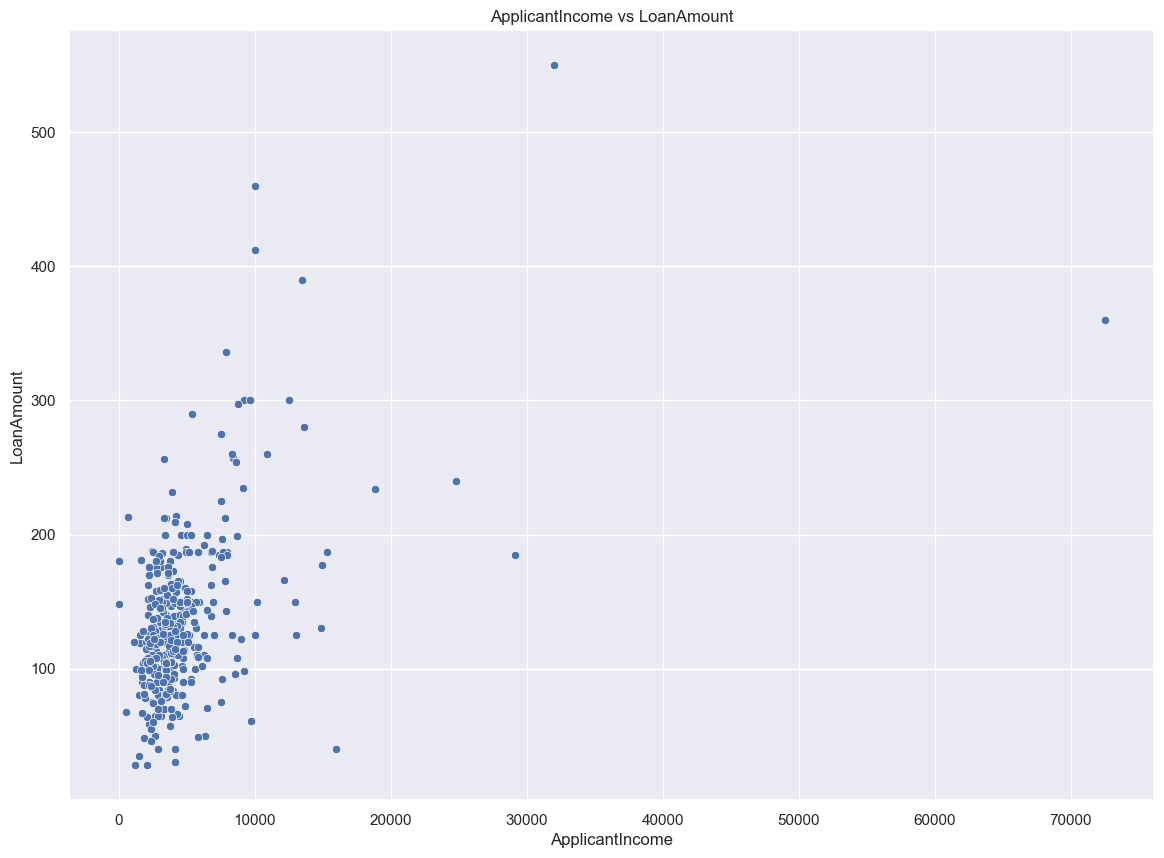

In [128]:
scatter_plot(df, 'ApplicantIncome', 'LoanAmount')

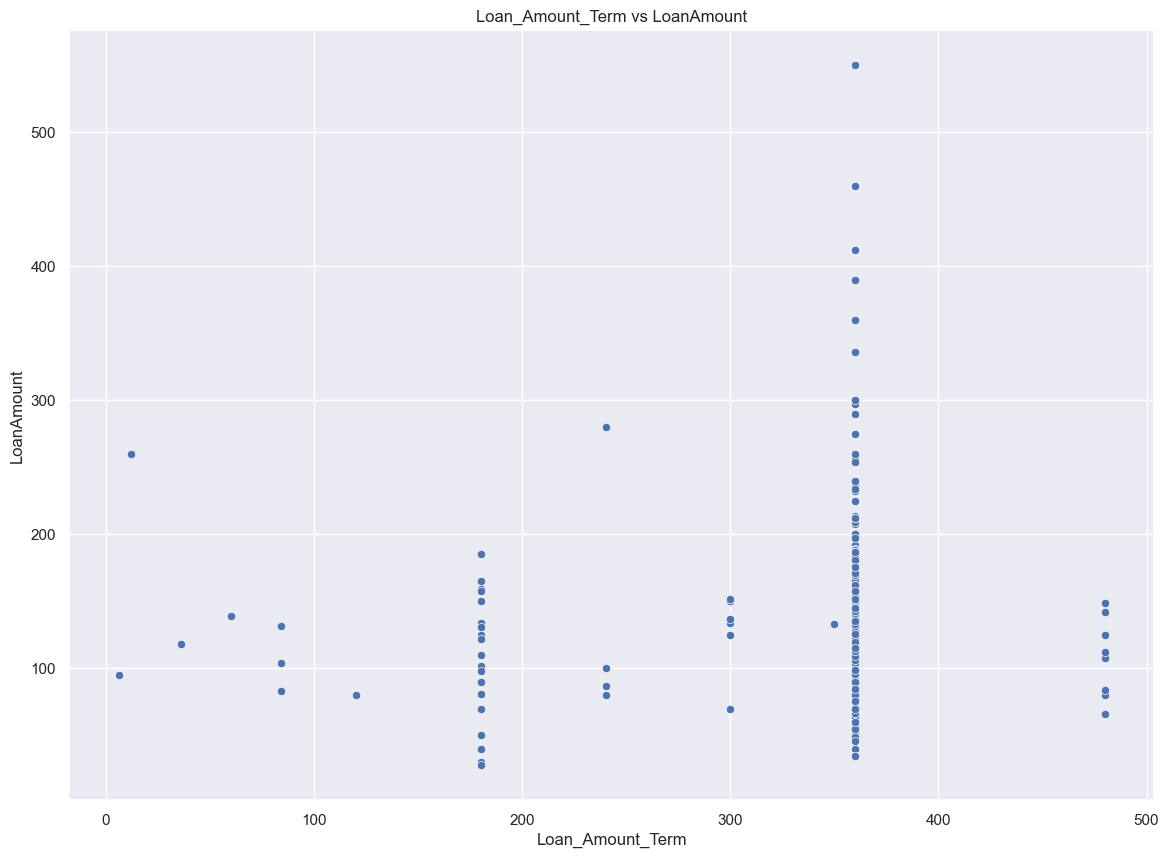

In [130]:
scatter_plot(df, 'Loan_Amount_Term', 'LoanAmount')

In [111]:
df['Credit_History'].value_counts()

Credit_History
1.0    308
0.0     59
Name: count, dtype: int64

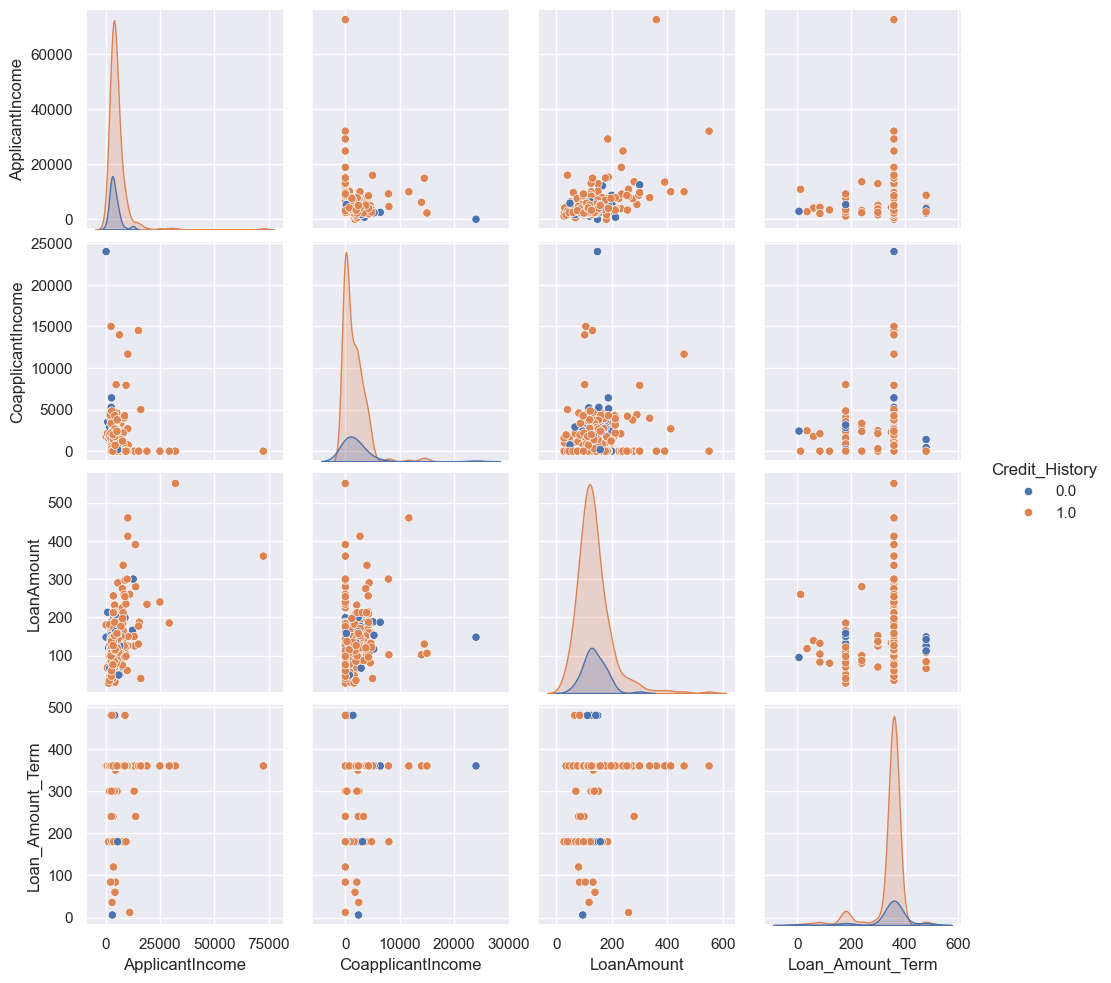

In [119]:
## pairplot
sns.pairplot(df, hue = 'Credit_History')

## Multivariate Analysis

In [134]:
#1 .....> Correlation matrix
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 42.5+ KB


In [150]:
#category based scatter plot

def scatter_plot(data, x, y, hue = 'Gender'):
    plt.figure(figsize=(14,10))
    sns.scatterplot(data= data, x =x , y=y, hue = hue)
    plt.title(f"{x} vs {y}")
    plt.show()

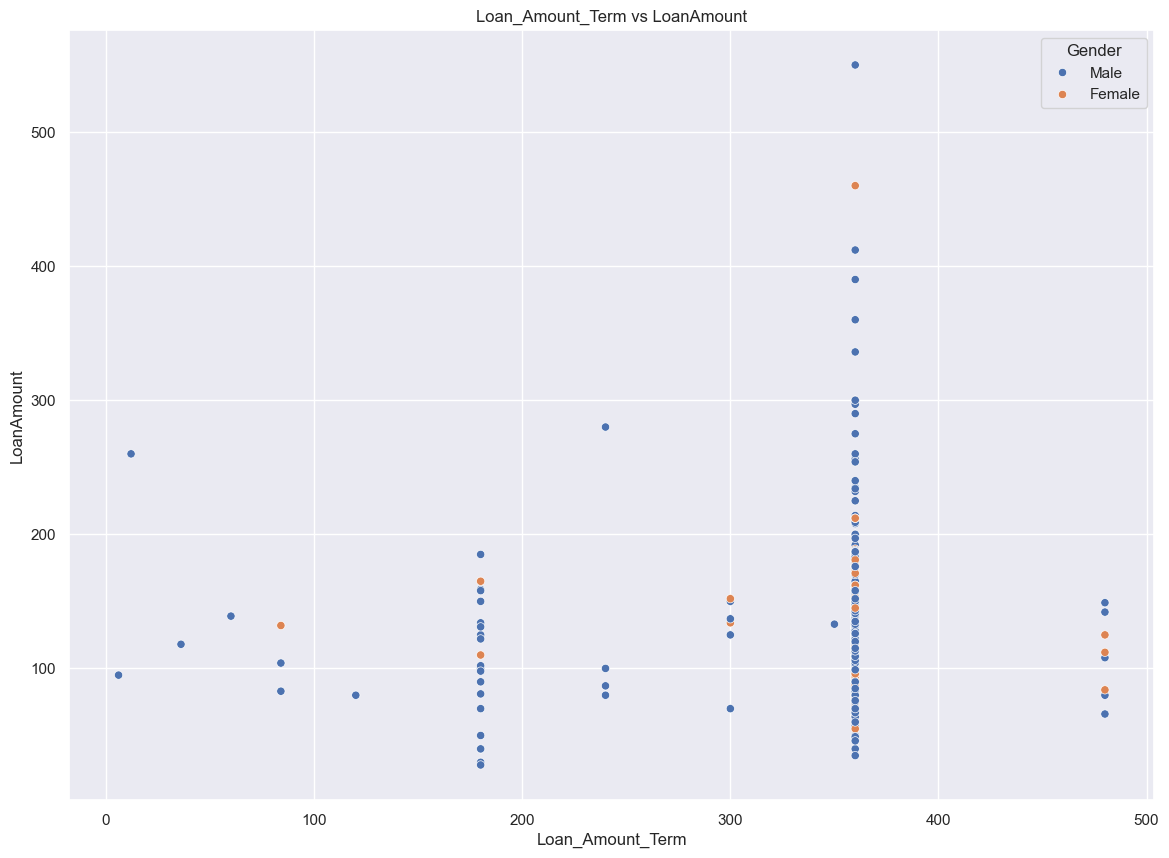

In [152]:
scatter_plot(df,'Loan_Amount_Term' , 'LoanAmount')

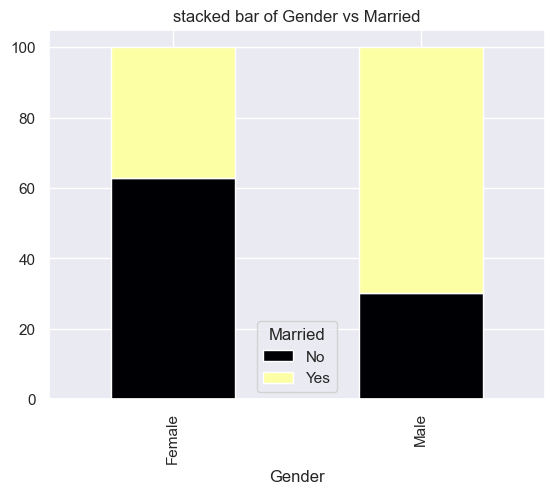

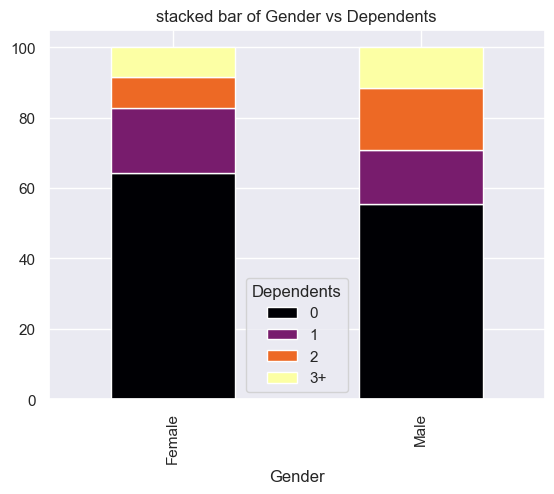

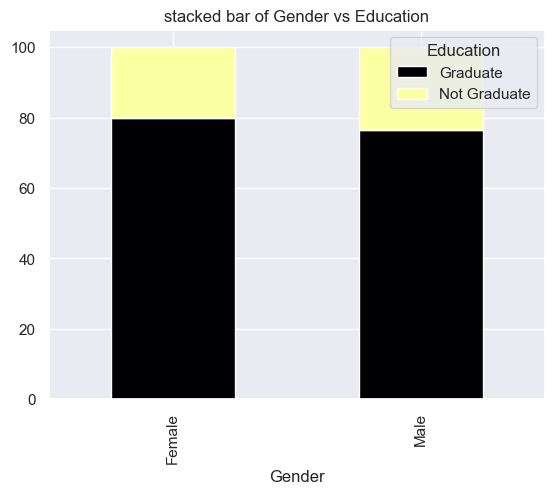

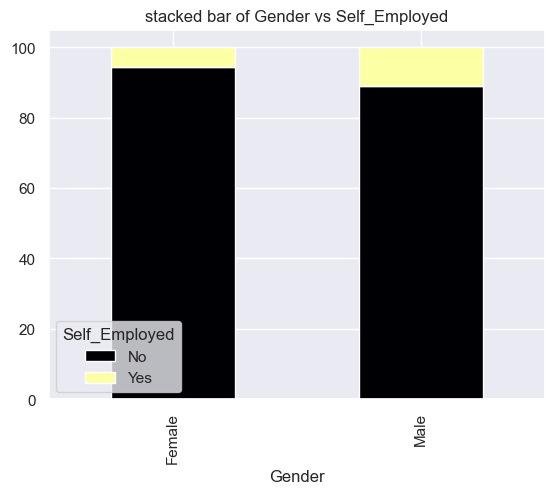

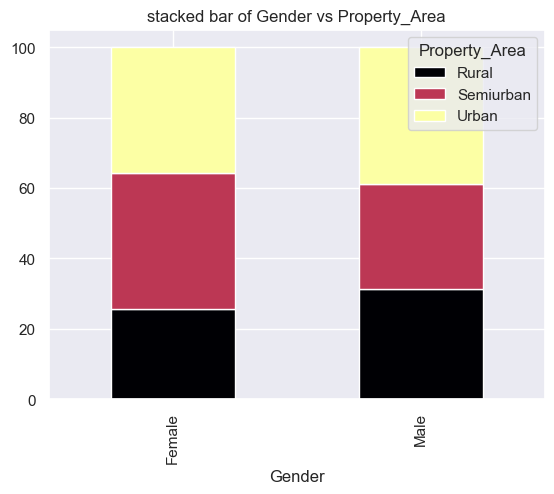

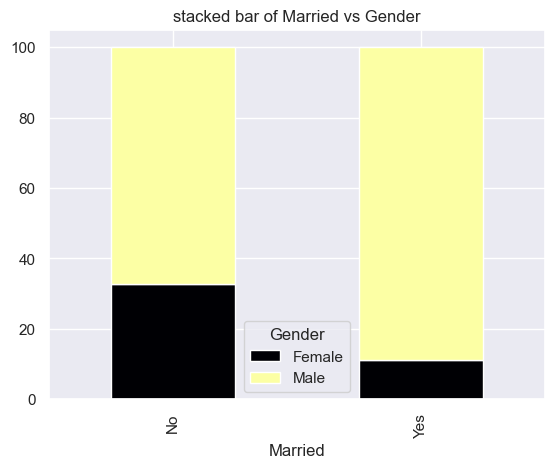

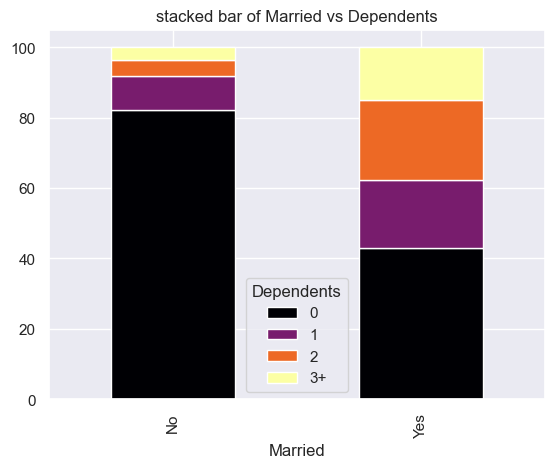

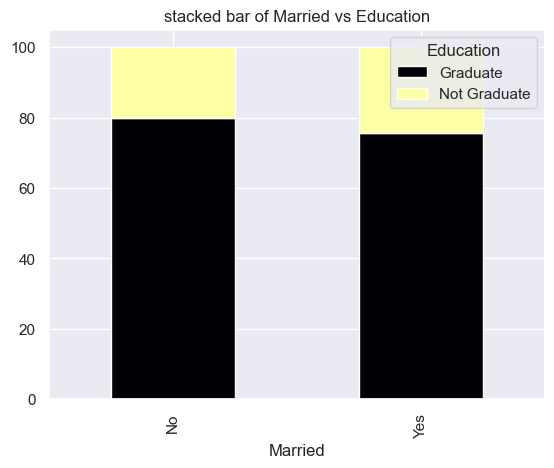

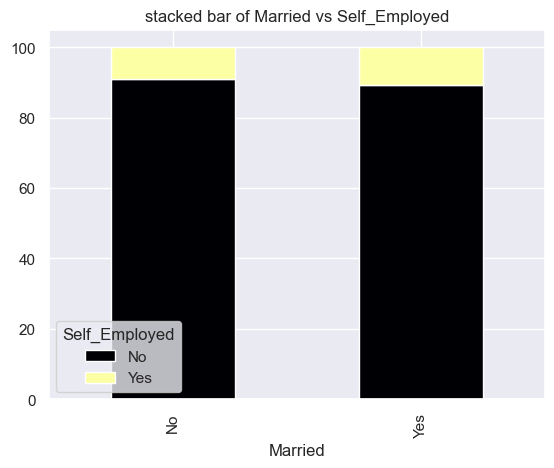

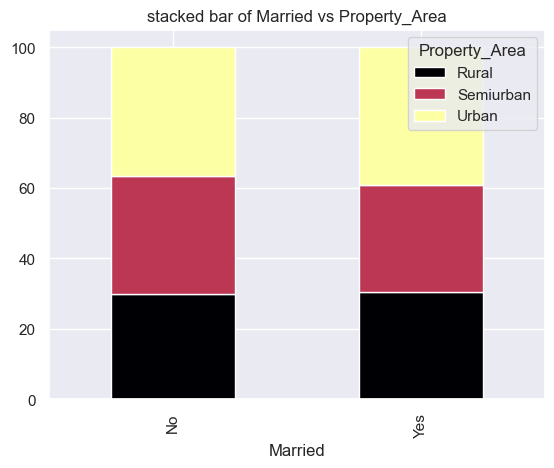

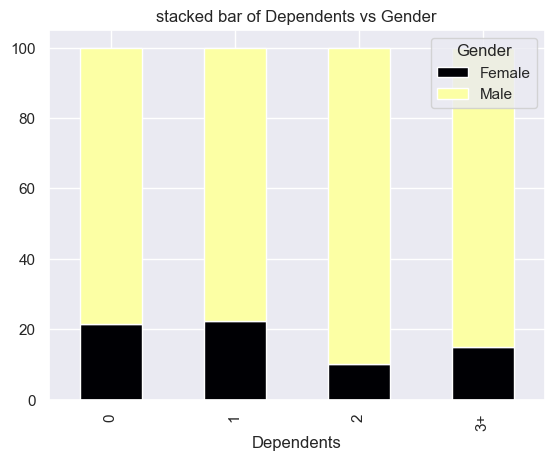

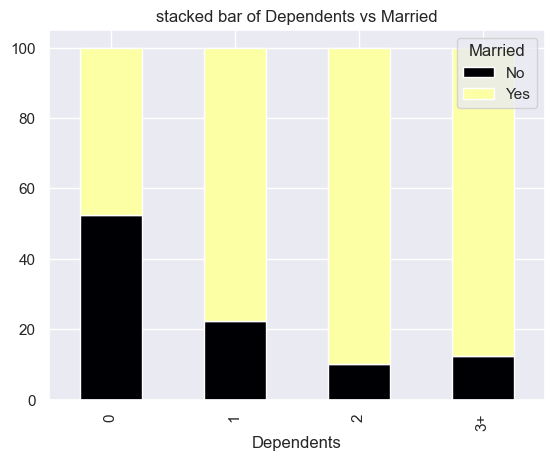

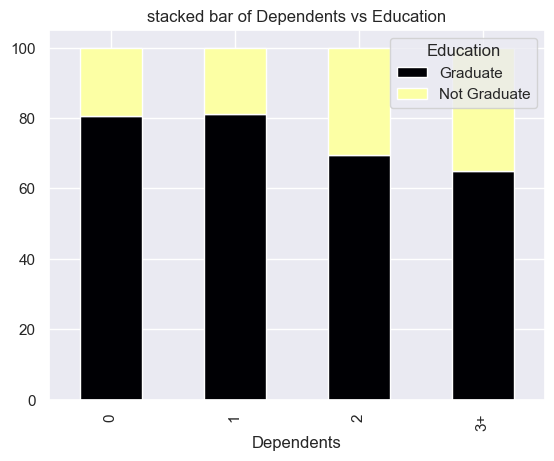

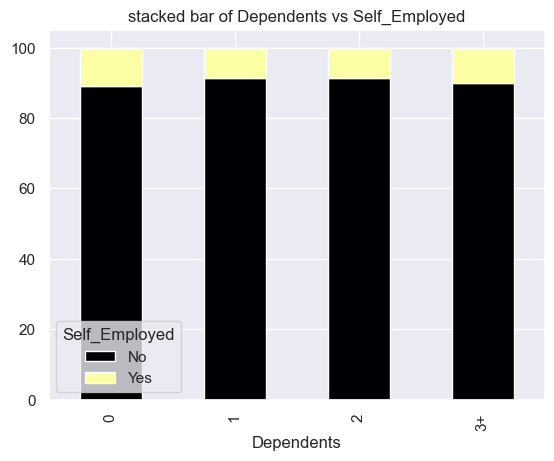

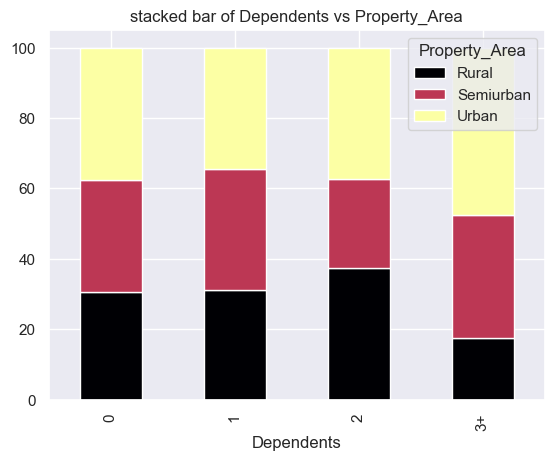

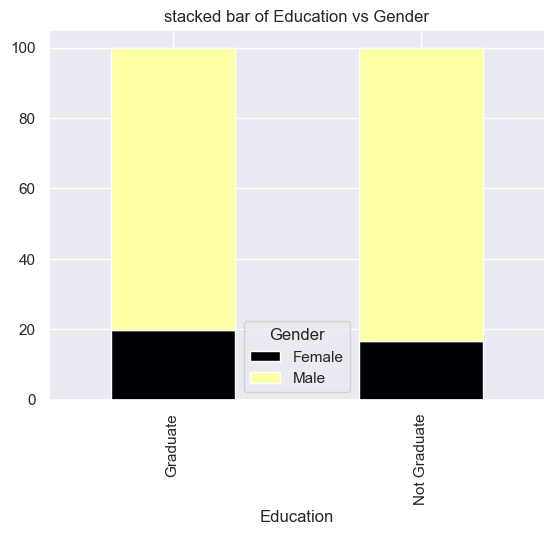

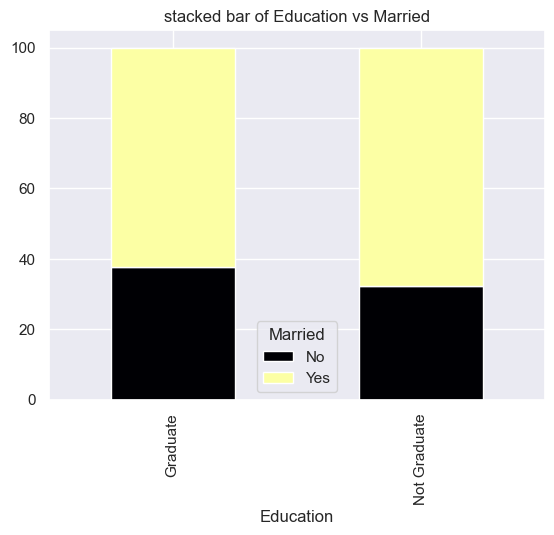

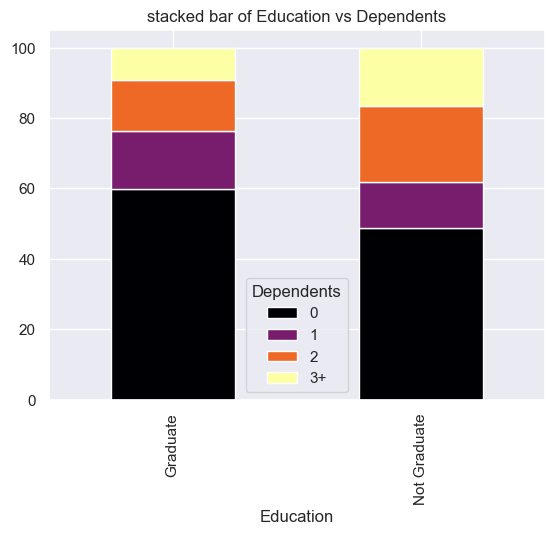

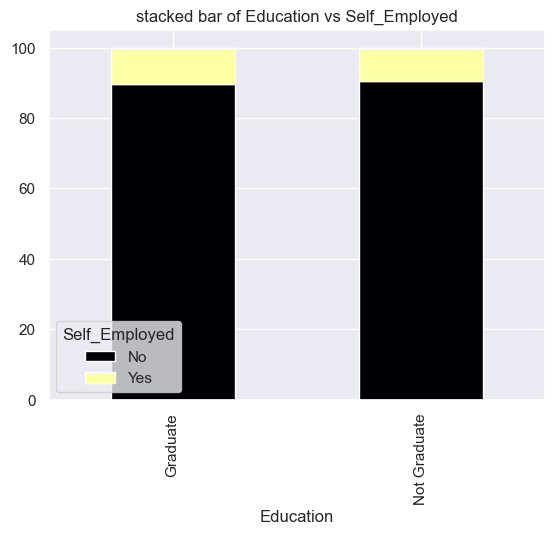

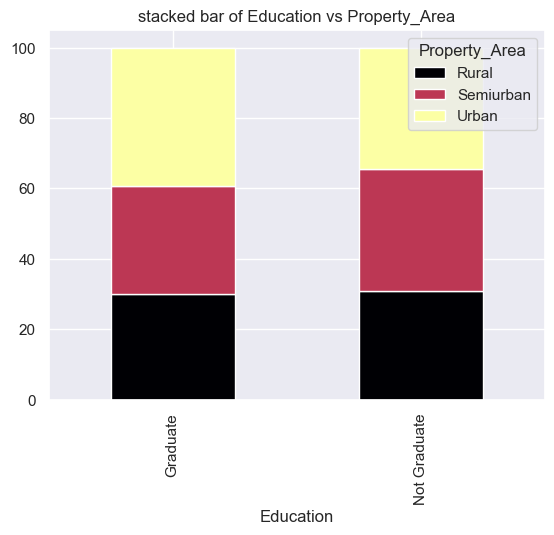

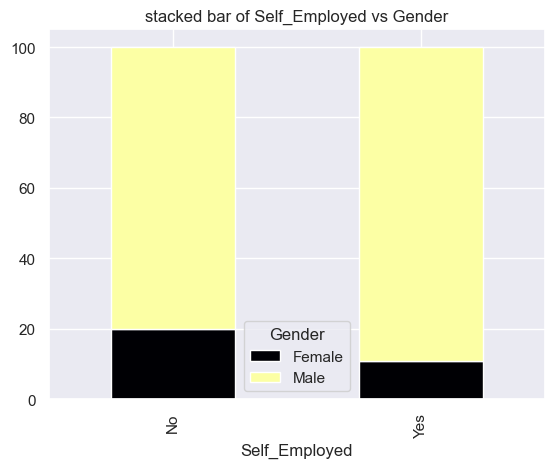

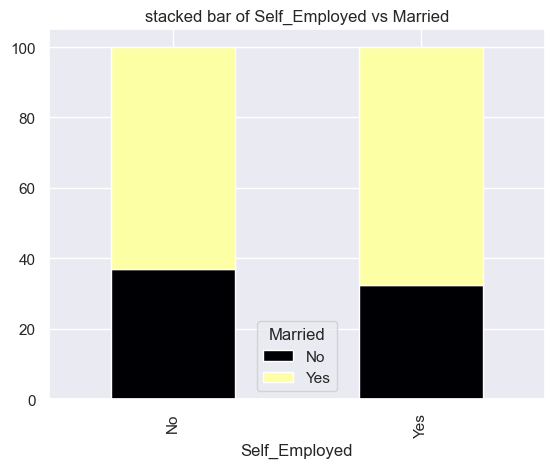

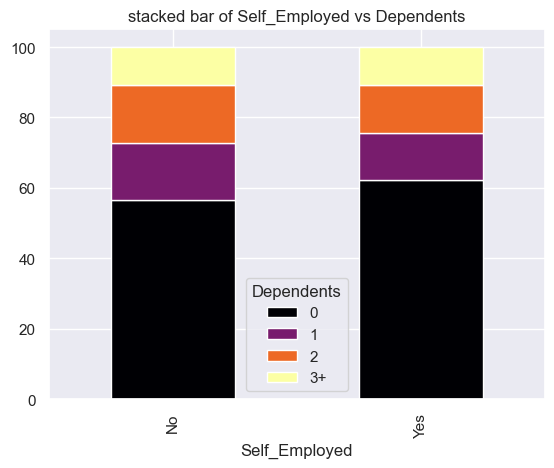

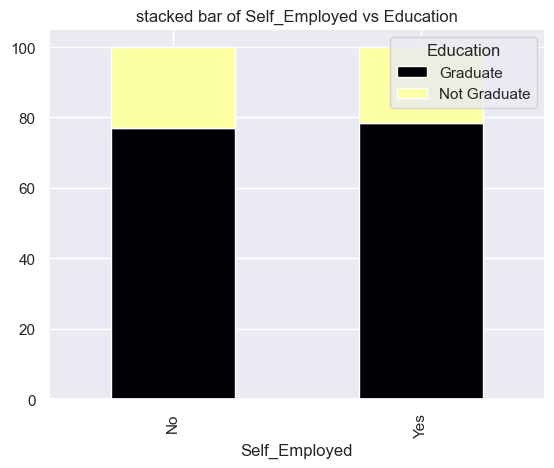

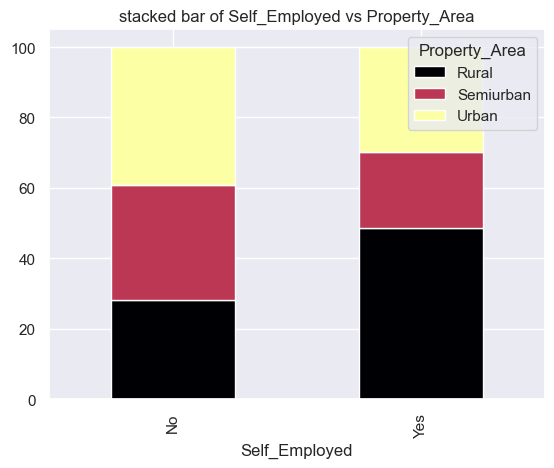

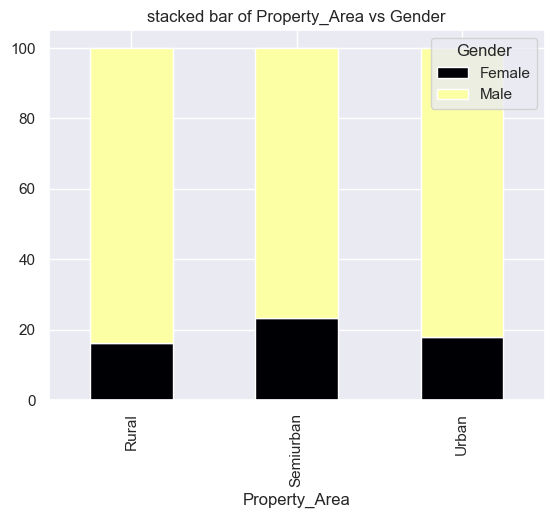

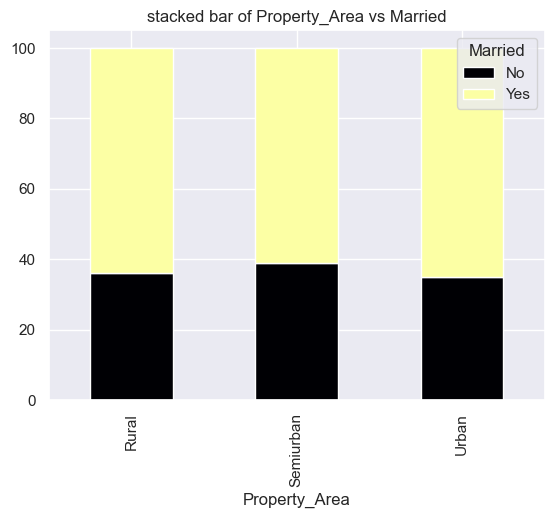

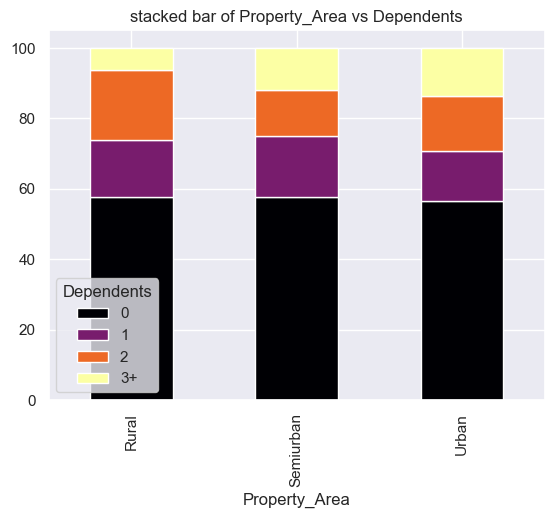

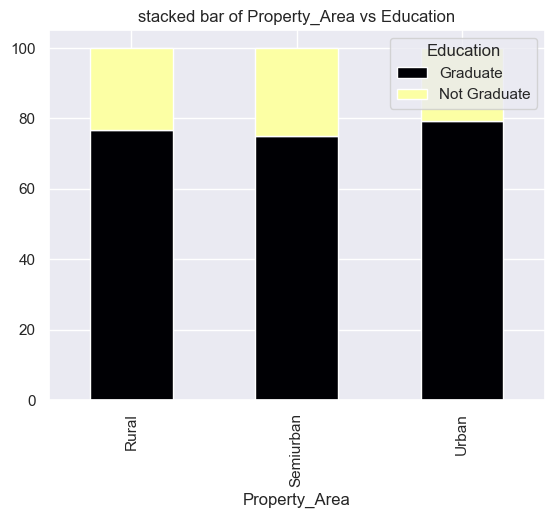

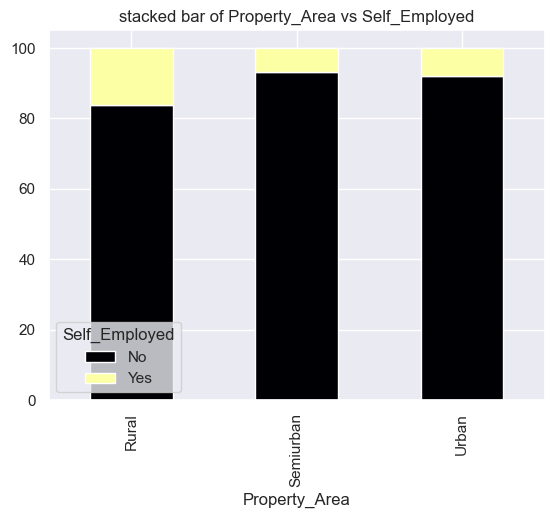

In [164]:
#Create a stacked bar chart to show the distribution of categorical variables across multiple categories.
for i,cat1 in enumerate(cat_col):
    for j,cat2 in enumerate(cat_col):
        if i!=j:
            crosstab = pd.crosstab(df[cat1], df[cat2],normalize = 'index') * 100
            crosstab.plot(kind = 'bar', stacked = True, colormap = 'inferno')
            plt.title(f"stacked bar of {cat1} vs {cat2}")
            plt.show()

In [156]:
cat_col

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001015,Male,Yes,0,Graduate,No,Urban
LP001022,Male,Yes,1,Graduate,No,Urban
LP001031,Male,Yes,2,Graduate,No,Urban
LP001035,Male,Yes,2,Graduate,No,Urban
LP001051,Male,No,0,Not Graduate,No,Urban
...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,Urban
LP002975,Male,Yes,0,Graduate,No,Urban
LP002980,Male,No,0,Graduate,No,Semiurban


In [158]:
crosstab

Self_Employed,No,Yes
Property_Area,,
Rural,83.783784,16.216216
Semiurban,93.103448,6.896552
Urban,92.142857,7.857143


In [194]:
#Create a stacked bar chart to show the distribution of categorical variables across multiple categories.
for i,cat1 in enumerate(cat_col):
    for j,cat2 in enumerate(cat_col):
        if i!=j:
            sns.barplot(df, x = df[cat1].value_counts().reset_index()[0], y = df[cat2].value_counts().reset_index()[1])
            plt.title(f"stacked bar of {cat1} vs {cat2}")
            plt.show()

KeyError: 0

In [198]:
df['Gender'].value_counts().reset_index()['Gender']

0      Male
1    Female
Name: Gender, dtype: object